### EDA Preliminar

<h5>Realizamos primero la importación de librerías necesarias para los distintos análisis a realizar en el presente EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

<h5>A continuación cargamos los datasets y los asignamos a diferentes Dataframes

In [2]:
df_user_Yelp = pd.read_csv(r"datasets\Yelp_users.csv")
df_reviews_Yelp = pd.read_csv(r"datasets\Yelp_reviews.csv")
df_business_Yelp = pd.read_csv(r"datasets\business_final.csv")

In [3]:
df_reviews_CA_Google = pd.read_csv(r"datasets\CA_reviews.csv")
df_reviews_FL_Google = pd.read_csv(r"datasets\FL_reviews.csv")
df_reviews_NV_Google = pd.read_csv(r"datasets\NV_reviews.csv")

In [ ]:
df_shops_Google = pd.read_csv(r"datasets\google_shops.csv", sep=';')

# Leer el archivo CSV con el delimitador ;
df_shops_Google = pd.read_csv(r"datasets\google_shops.csv", sep=';')


<h4>Se muestran a continuación diversos análsis realizados sobre los datasets para lograr un mejor entendimiento de la información y poder así delinear las estrategias a seguir.

<h5> 1º Análisis de Duplicados

In [9]:
# DataFrame df_user_Yelp
duplicates_user_Yelp = df_user_Yelp[df_user_Yelp.duplicated()]
print("Duplicados en df_user_Yelp:")
print(duplicates_user_Yelp)

# DataFrame df_reviews_Yelp
duplicates_reviews_Yelp = df_reviews_Yelp[df_reviews_Yelp.duplicated()]
print("Duplicados en df_reviews_Yelp:")
print(duplicates_reviews_Yelp)

# DataFrame df_business_Yelp
duplicates_business_Yelp = df_business_Yelp[df_business_Yelp.duplicated()]
print("Duplicados en df_business_Yelp:")
print(duplicates_business_Yelp)

# DataFrame df_reviews_CA_Google
duplicates_reviews_CA_Google = df_reviews_CA_Google[df_reviews_CA_Google.duplicated()]
print("Duplicados en df_reviews_CA_Google:")
print(duplicates_reviews_CA_Google)

# DataFrame df_reviews_FL_Google
duplicates_reviews_FL_Google = df_reviews_FL_Google[df_reviews_FL_Google.duplicated()]
print("Duplicados en df_reviews_FL_Google:")
print(duplicates_reviews_FL_Google)

# DataFrame df_reviews_NV_Google
duplicates_reviews_NV_Google = df_reviews_NV_Google[df_reviews_NV_Google.duplicated()]
print("Duplicados en df_reviews_NV_Google:")
print(duplicates_reviews_NV_Google)

# DataFrame df_shops_Google
duplicates_shops_Google = df_shops_Google[df_shops_Google.duplicated()]
print("Duplicados en df_shops_Google:")
print(duplicates_shops_Google)


Duplicados en df_user_Yelp:
Empty DataFrame
Columns: [Unnamed: 0, user_id, name, review_count, useful, funny, cool, elite, fans, average_stars, compliment_hot, compliment_more, compliment_profile, compliment_cute, compliment_list, compliment_note, compliment_plain, compliment_cool, compliment_funny, compliment_writer, compliment_photos]
Index: []

[0 rows x 21 columns]
Duplicados en df_reviews_Yelp:
Empty DataFrame
Columns: [Unnamed: 0, review_id, user_id, business_id, stars, useful, funny, cool, text, date]
Index: []
Duplicados en df_business_Yelp:
Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, hours]
Index: []
Duplicados en df_reviews_CA_Google:
Empty DataFrame
Columns: [Unnamed: 0, user_id, name, time, rating, text, gmap_id]
Index: []
Duplicados en df_reviews_FL_Google:
Empty DataFrame
Columns: [Unnamed: 0, user_id, name, time, rating, text, gmap_id]
Index: []
Duplicados en df

In [10]:
# Contar los valores únicos en la columna "name" de df_shops_Google
num_unique_names = df_shops_Google['name'].nunique()

print(f"El número de valores diferentes en la columna 'name' de df_shops_Google es: {num_unique_names}")

El número de valores diferentes en la columna 'name' de df_shops_Google es: 435162


<h5>2º Análisis de Outliers

In [11]:
# Define una función para detectar outliers utilizando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Realiza el análisis de outliers para cada DataFrame
outliers_user_Yelp = detect_outliers_iqr(df_user_Yelp, 'review_count')
outliers_reviews_Yelp = detect_outliers_iqr(df_reviews_Yelp, 'stars')
outliers_business_Yelp = detect_outliers_iqr(df_business_Yelp, 'review_count')
outliers_reviews_CA_Google = detect_outliers_iqr(df_reviews_CA_Google, 'rating')
outliers_reviews_FL_Google = detect_outliers_iqr(df_reviews_FL_Google, 'rating')
outliers_reviews_NV_Google = detect_outliers_iqr(df_reviews_NV_Google, 'rating')
outliers_shops_Google = detect_outliers_iqr(df_shops_Google, 'avg_rating')

# Muestra los resultados
print("Outliers en df_user_Yelp:")
print(outliers_user_Yelp)

print("Outliers en df_reviews_Yelp:")
print(outliers_reviews_Yelp)

print("Outliers en df_business_Yelp:")
print(outliers_business_Yelp)

print("Outliers en df_reviews_CA_Google:")
print(outliers_reviews_CA_Google)

print("Outliers en df_reviews_FL_Google:")
print(outliers_reviews_FL_Google)

print("Outliers en df_reviews_NV_Google:")
print(outliers_reviews_NV_Google)

print("Outliers en df_shops_Google:")
print(outliers_shops_Google)


Outliers en df_user_Yelp:
        Unnamed: 0                 user_id    name  review_count  useful  \
0                0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585    7217   
1                1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333   43091   
2                2  2WnXYQFK0hXEoTxPtV2zvg   Steph           665    2086   
3                3  SZDeASXq7o05mMNLshsdIA    Gwen           224     512   
4                4  hA5lMy-EnncsH4JoR-hFGQ   Karen            79      29   
...            ...                     ...     ...           ...     ...   
932958     2105548  d-U_47DSQnAy2zcGKy7TYA      AJ           267      91   
932962     2105555  SfjmhttjXH8wAuYTciNwtw   Lydia           402     348   
932970     2105567  AD_J5VPSs0peOyzEWDLFpA    Alma           436     243   
932973     2105571  dW2ZLepTxPBERAUPqGC-jg  Lynsey            75     113   
932987     2105591  Ss62yaJCCrxLgBkkUhXAQw   Carla            96     194   

        funny   cool                                         

<h4> Boxplot

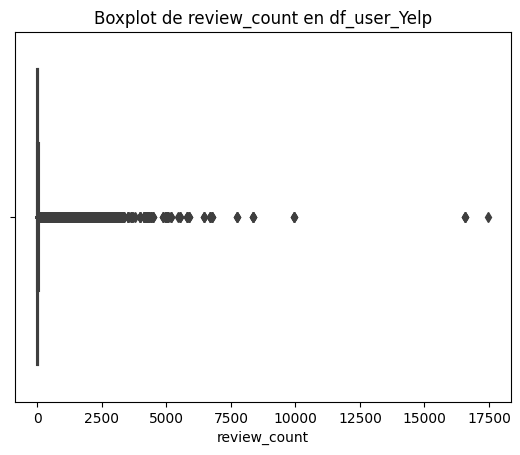

In [12]:
# Ejemplo con df_user_Yelp
sns.boxplot(x='review_count', data=df_user_Yelp)
plt.title('Boxplot de review_count en df_user_Yelp')
plt.show()

<h4> Dispersión

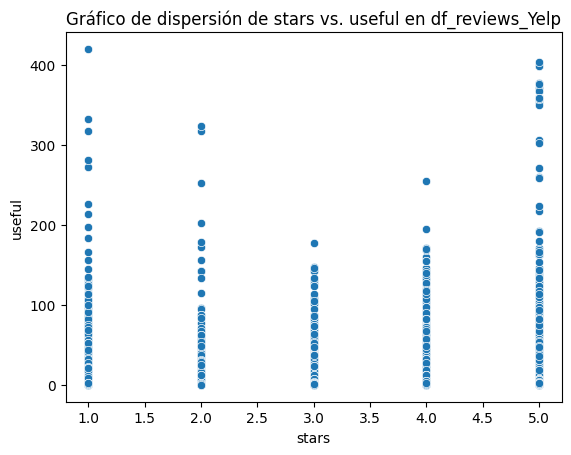

In [13]:
# Ejemplo con df_reviews_Yelp
sns.scatterplot(x='stars', y='useful', data=df_reviews_Yelp)
plt.title('Gráfico de dispersión de stars vs. useful en df_reviews_Yelp')
plt.show()

<h4>Histogramas

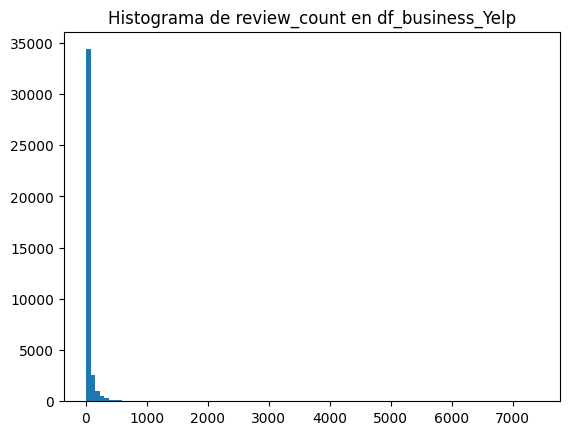

In [14]:
# Ejemplo con df_business_Yelp
plt.hist(df_business_Yelp['review_count'], bins=100)
plt.title('Histograma de review_count en df_business_Yelp')
plt.show()

<h4> Densidad

C:\Users\mpvac\AppData\Local\Temp\ipykernel_9928\2861855712.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_reviews_CA_Google['rating'], shade=True)


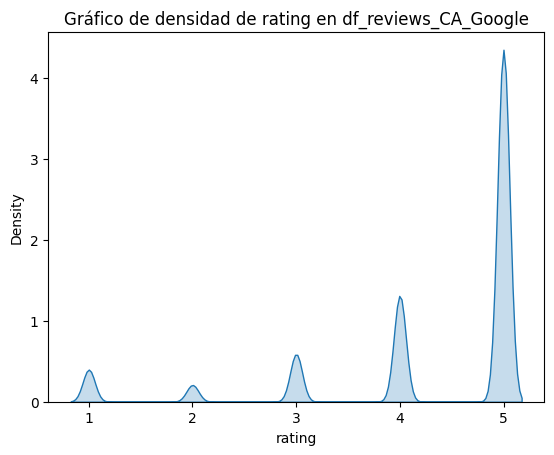

In [16]:
# Ejemplo con df_reviews_CA_Google
sns.kdeplot(df_reviews_CA_Google['rating'], shade=True)
plt.title('Gráfico de densidad de rating en df_reviews_CA_Google')
plt.show()

<h4>Gráficos Q-Q (Quantile-Quantile)

In [17]:
print(df_reviews_FL_Google.columns)

Index(['Unnamed: 0', 'user_id', 'name', 'time', 'rating', 'text', 'gmap_id'], dtype='object')


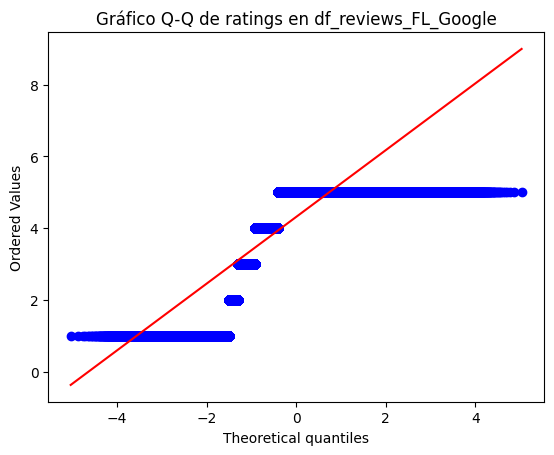

In [18]:
import scipy.stats as stats

# Ejemplo con df_reviews_FL_Google
stats.probplot(df_reviews_FL_Google['rating'], plot=plt)
plt.title('Gráfico Q-Q de ratings en df_reviews_FL_Google')
plt.show()

<h4>Gráficos de caja y bigotes con orientación específica

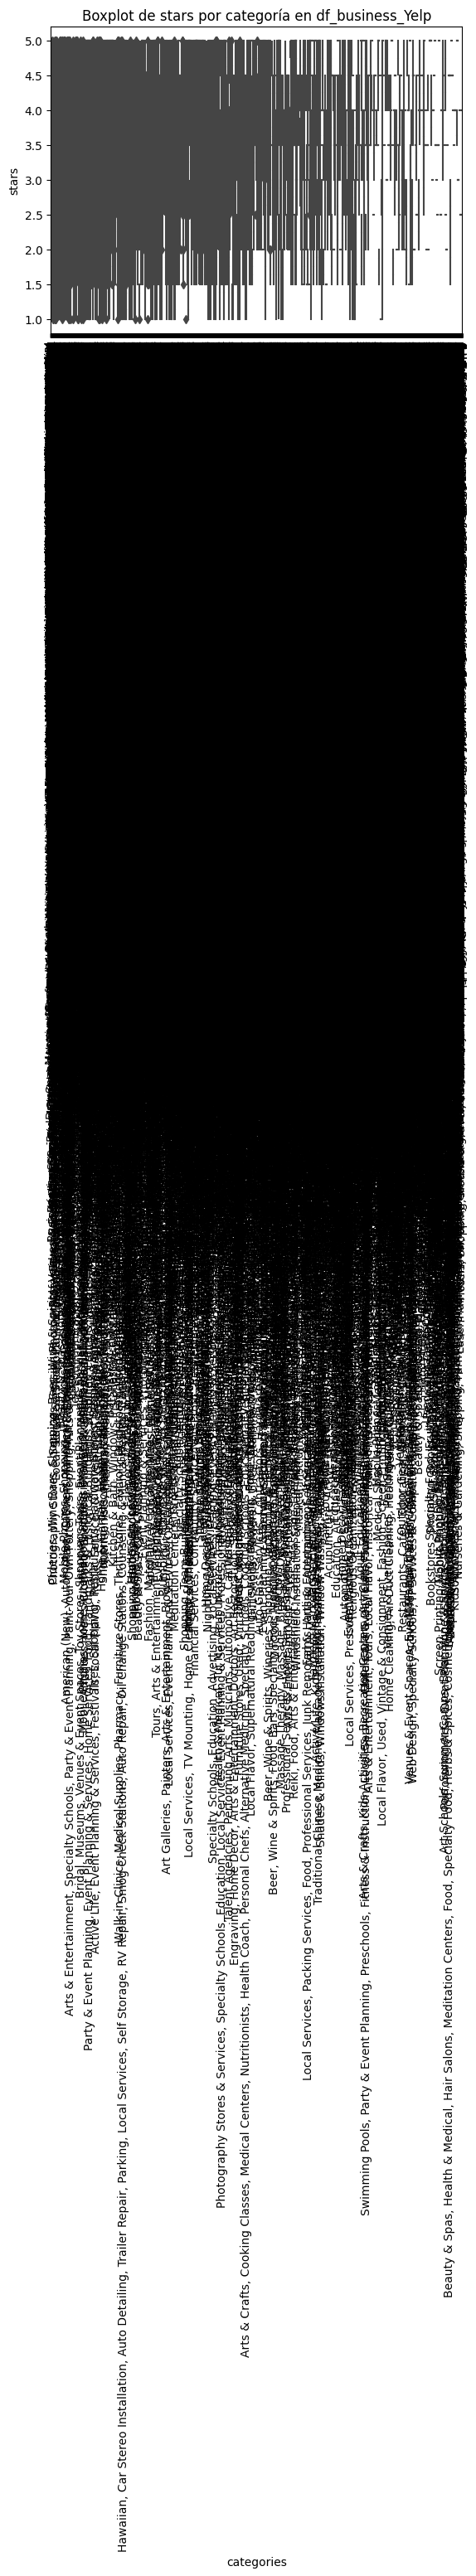

In [19]:
# Ejemplo con df_business_Yelp
sns.boxplot(x='categories', y='stars', data=df_business_Yelp)
plt.xticks(rotation=90)
plt.title('Boxplot de stars por categoría en df_business_Yelp')
plt.show()

In [1]:
df_business_Yelp

NameError: name 'df_business_Yelp' is not defined

In [ ]:
# Puedes explorar la columna "categories" así:
categories_column = df_business_Yelp['categories']

# Imprimir los valores únicos presentes en la columna "categories"
unique_categories = categories_column.unique()
print(unique_categories)

# Contar la cantidad de categorías diferentes
num_unique_categories = len(unique_categories)
print("Número de categorías diferentes:", num_unique_categories)


<h5>5º Análisis de Correlación

Se trabajó primero con el Dataframe generado a partir del archivo `user.parquet` que contiene las reseñas de los usuarios de **Yelp**

In [3]:
# Seleccionar solo las columnas numéricas relevantes
columns_of_interest = ['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars',
                       'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute',
                       'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool',
                       'compliment_funny', 'compliment_writer', 'compliment_photos']
df_numeric = df_user_Yelp[columns_of_interest]

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                    review_count    useful     funny      cool      fans  \
review_count            1.000000  0.620495  0.522736  0.540549  0.492266   
useful                  0.620495  1.000000  0.956912  0.991064  0.602739   
funny                   0.522736  0.956912  1.000000  0.967648  0.554269   
cool                    0.540549  0.991064  0.967648  1.000000  0.561540   
fans                    0.492266  0.602739  0.554269  0.561540  1.000000   
average_stars           0.038206  0.012878  0.008419  0.012738  0.018357   
compliment_hot          0.302174  0.624332  0.672057  0.642451  0.397101   
compliment_more         0.207726  0.405390  0.442675  0.415486  0.229756   
compliment_profile      0.142936  0.323972  0.360419  0.337554  0.167894   
compliment_cute         0.133254  0.260553  0.295445  0.269523  0.193401   
compliment_list         0.102141  0.209216  0.234750  0.215751  0.120748   
compliment_note         0.265486  0.487527  0.492931  0.489068  0.340750   
compliment_p

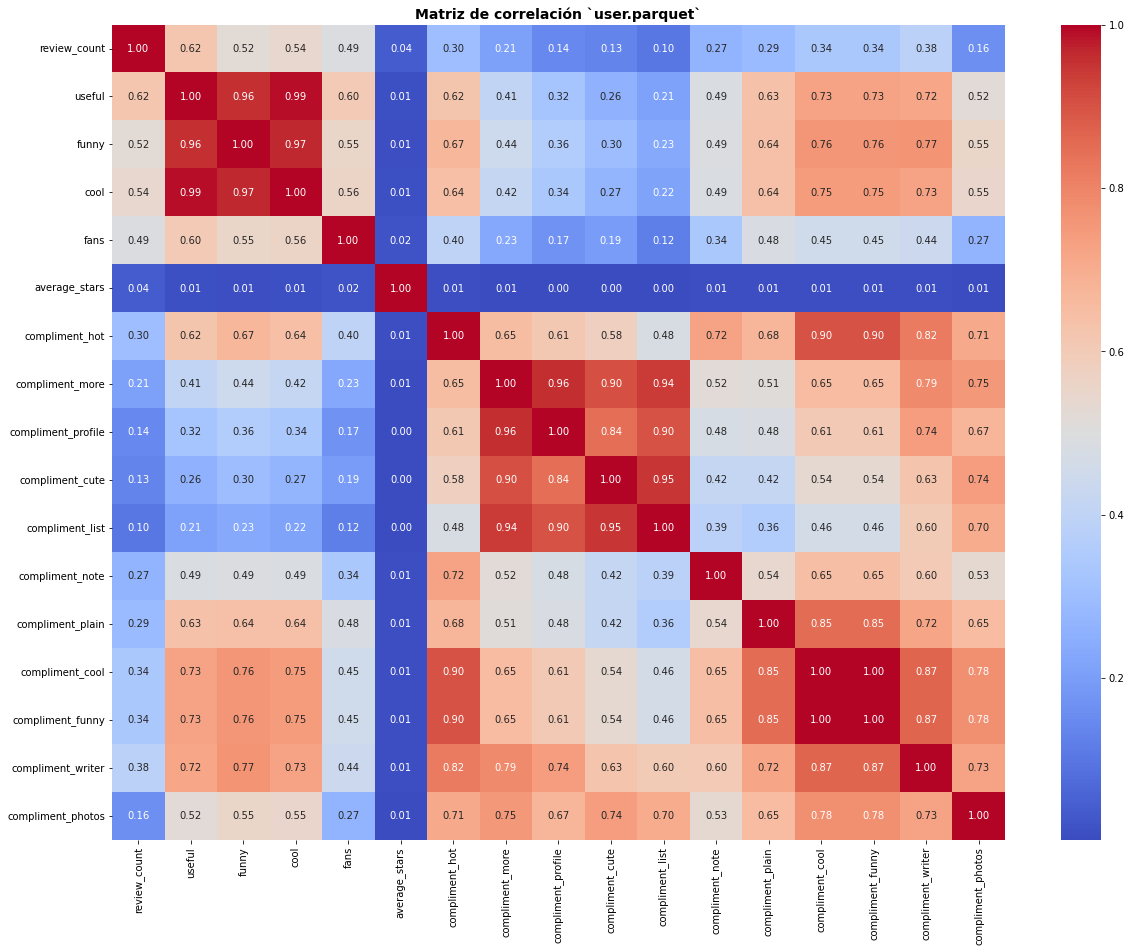

In [4]:
# Crear un heatmap con Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación `user.parquet`', fontsize=14, fontweight='bold')
plt.show()

<h4> Análisis de la Matriz de correlación (Heat Map)

<ol><li> <strong>Columnas con alta correlación positiva entre sí (colores rojizos):</strong> estas columnas se encuentran altamente relacionadas por lo que aportan información redundante. Se sugiere sólo tomar un de entre todas, que mejor se relacione con el parámetro objetivo.</li>
<li>Las columnas <strong>fans</strong> y <strong>review_count</strong> poseen una correlación moderada (cercana al 50%) lo que indica que los usuarios más activos (con más reseñas) tienen también más seguidores.</li>
<li>El promedio de calificación o <strong>average_stars</strong> tiene correlaciones bajas con el resto de las columnas, por lo que podría concluirse que su impacto en un posible sistema de recomendación sería limitado.</li>
<li>Los campos <strong>review_count</strong>, <strong>useful</strong>, <strong>funny</strong>, y <strong>cool</strong> tienen correlaciones moderadamente positivas entre sí. Esto indica que los usuarios que realizan más reseñas tienden a recibir más votos útiles, graciosos y geniales en sus reseñas.</li>
<li>Los campos <strong>compliment_***</strong> están altamente correlacionados entre sí, por lo que miden aspectos similares del comportamiento de los usuarios en esa plataforma.</li>

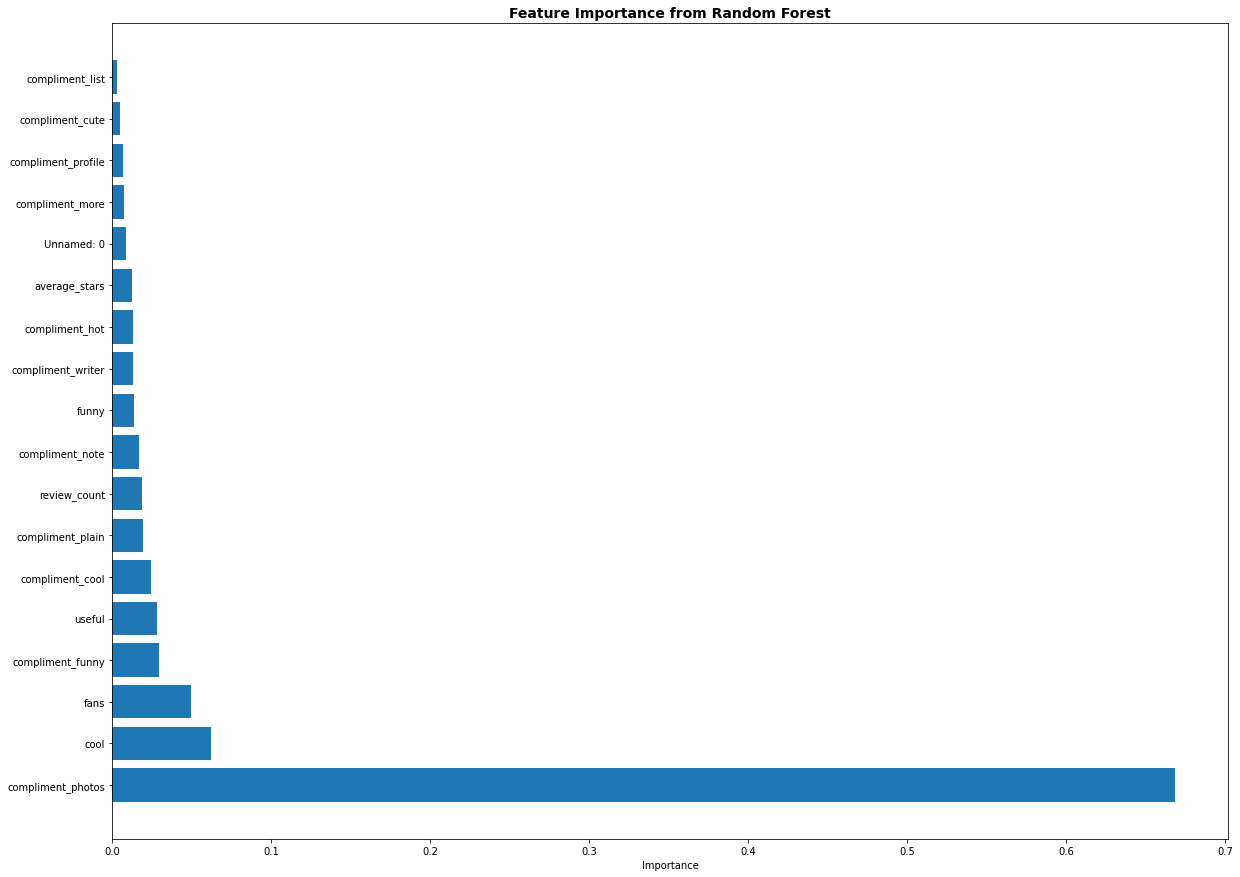

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier


# Cargar el DataFrame df_user_Yelp_filt
# (Asumiendo que ya está cargado previamente)

# Eliminar columnas no necesarias para el análisis
selected_columns = df_user_Yelp.drop(['user_id', 'name', 'elite'], axis=1)

# Definir la variable objetivo (recomendaciones)
target = df_user_Yelp['compliment_photos']  # Por ejemplo, usamos 'compliment_photos' como ejemplo de objetivo

# 1. Análisis de Importancia de Características mediante Árboles de Decisión
# Entrenar un clasificador basado en Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(selected_columns, target)

# Obtener la importancia de las características
feature_importance = pd.DataFrame({'feature': selected_columns.columns, 'importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(20, 15))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest', fontsize=14, fontweight='bold')
plt.show()

